<a href="https://colab.research.google.com/github/syh0397/User_analysis_elec/blob/main/3_%EC%9D%BC%EB%B3%84%EA%B5%AC%EB%A7%A4%EC%A0%84%ED%99%98%EC%9C%A8_%2B_%EC%B2%B4%EB%A5%98%EC%8B%9C%EA%B0%84%EB%B6%84%ED%8F%AC_%EC%B8%A1%EC%A0%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import os
#
import scipy.stats as stats
#
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.4f}'.format

In [3]:
#한글 나눔 글꼴설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

plt.rc('font', family='NanumBarunGothic')


Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following packages were automatically installed and are no longer required:
  cuda-command-line-tools-10-0 cuda-command-line-tools-10-1
  cuda-command-line-tools-11-0 cuda-compiler-10-0 cuda-compiler-10-1
  cuda-compiler-11-0 cuda-cuobjdump-10-0 cuda-cuobjdump-10-1
  cuda-cuobjdump-11-0 cuda-cupti-10-0 cuda-cupti-10-1 cuda-cupti-11-0
  cuda-cupti-dev-11-0 cuda-documentation-10-0 cuda-documentation-10-1
  cuda-documentation-11-0 cuda-documentation-11-1 cuda-gdb-10-0 cuda-gdb-10-1
  cuda-gdb-11-0 cuda-gpu-library-advisor-10-0 cuda-gpu-library-advisor-10-1
  cuda-libraries-10-0 cuda-libraries-10-1 cuda-libraries-11-0
  cuda-memcheck-10-0 cuda-memcheck-10-1 cuda-memcheck-11-0 cuda-nsight-10-0
  cuda-nsight-10-1 cuda-nsight-11-0 cuda-nsight-11-1 cuda-nsight-compute-10-0
  cuda-nsight-compute-10-1 cuda-nsight-compute-11-0 cuda-nsight-comp

In [4]:
df= pd.read_csv('/content/drive/MyDrive/DATA/main_ecommerce.csv')
df = df.sort_values(by=['user_id','date_'] ,ascending=True)

In [5]:
df

,Unnamed: 0,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,date,time,main_category,mdi_category,sub_category,date_,diff,check_,coh,new_session,New_sessoion,start_day,days_since_start,start_week,weeks_since_start,start_month,months_since_start
190281,174670,2020-10-29 11:28:35,view,4101974,2144415939364389423,electronics.clocks,honor,76.4800,1515915625353226922,7qejzWzHlR,2020-10-29,11:28:35,electronics,clocks,NaN,2020-10-29 11:28:35,-24 days +19:01:57,False,1.0000,New,new,2020-10-29,0,2020-10-28,0.0000,2020-10-01,0.0000
60747,51155,2020-10-06 06:30:32,view,3506650,2144415935673401802,NaN,kester,28.9800,1515915625353230067,ikPKHkuRhA,2020-10-06,06:30:32,NaN,NaN,NaN,2020-10-06 06:30:32,34 days 02:22:19,New,3145.0000,New,new,2020-10-06,0,2020-10-05,0.0000,2020-10-01,0.0000
260124,242211,2020-11-09 08:52:51,view,124883,2144415924424278172,electronics.audio.acoustic,logitech,23.9000,1515915625353230683,dn9FkZ11dA,2020-11-09,08:52:51,electronics,audio,acoustic,2020-11-09 08:52:51,0 days 00:11:43,False,616.0000,New,new,2020-11-09,0,2020-11-09,0.0000,2020-11-01,0.0000
260125,242297,2020-11-09 09:04:34,view,760044,2144415924424278172,electronics.audio.acoustic,dell,48.7300,1515915625353230683,dn9FkZ11dA,2020-11-09,09:04:34,electronics,audio,acoustic,2020-11-09 09:04:34,0 days 00:04:19,False,0.0000,False,exist,2020-11-09,0,2020-11-09,0.0000,2020-11-01,0.0000
260126,242335,2020-11-09 09:08:53,view,125325,2144415924424278172,electronics.audio.acoustic,logitech,23.9000,1515915625353230683,dn9FkZ11dA,2020-11-09,09:08:53,electronics,audio,acoustic,2020-11-09 09:08:53,0 days 00:02:06,False,0.0000,False,exist,2020-11-09,0,2020-11-09,0.0000,2020-11-01,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885124,885123,2021-02-28 23:54:18,view,3829355,2144415922528452715,electronics.telephone,NaN,32.2200,1515915625611023671,wZb7gP1zgN,2021-02-28,23:54:18,electronics,telephone,NaN,2021-02-28 23:54:18,0 days 00:00:43,False,90.0000,New,new,2021-02-28,0,2021-02-27,0.0000,2021-02-01,0.0000
885125,885124,2021-02-28 23:55:01,view,953226,2144415927553229037,NaN,NaN,219.9400,1515915625611023730,FRLqIttxKU,2021-02-28,23:55:01,NaN,NaN,NaN,2021-02-28 23:55:01,0 days 00:03:04,False,59.0000,New,new,2021-02-28,0,2021-02-27,0.0000,2021-02-01,0.0000
885126,885125,2021-02-28 23:58:05,view,1715907,2144415927049912542,electronics.video.tv,starwind,80.0300,1515915625611024014,g6WqPf50Ma,2021-02-28,23:58:05,electronics,video,tv,2021-02-28 23:58:05,0 days 00:00:04,False,284.0000,New,new,2021-02-28,0,2021-02-27,0.0000,2021-02-01,0.0000
885127,885126,2021-02-28 23:58:09,view,4170534,2144415939364389423,electronics.clocks,amazfit,64.9200,1515915625611024020,xNIJBqZdkd,2021-02-28,23:58:09,electronics,clocks,NaN,2021-02-28 23:58:09,0 days 00:00:05,False,6.0000,New,new,2021-02-28,0,2021-02-27,0.0000,2021-02-01,0.0000


#### 세션 재할당

In [6]:
# New라는 값을 가지면 새로운 그룹으로 형성될 수 있게끔 하겠습니다. 
New_sessoion = df['New_sessoion'] == 'new'
New_sessoion = New_sessoion.to_frame()
New_sessoion

,New_sessoion
190281,True
60747,True
260124,True
260125,False
260126,False
...,...
885124,True
885125,True
885126,True
885127,True


In [7]:
# 세션을 그룹별로 정의해줍니다. 
New_sessoion['Session'] = New_sessoion['New_sessoion'].cumsum()
New_sessoion['Session'] = New_sessoion['Session'].astype(str)

In [8]:
# df와 New_sessoion을 합쳐줍니다.
df = pd.concat([df, New_sessoion], axis = 1)
df.head()

,Unnamed: 0,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,date,time,main_category,mdi_category,sub_category,date_,diff,check_,coh,new_session,New_sessoion,start_day,days_since_start,start_week,weeks_since_start,start_month,months_since_start,New_sessoion,Session
190281,174670,2020-10-29 11:28:35,view,4101974,2144415939364389423,electronics.clocks,honor,76.4800,1515915625353226922,7qejzWzHlR,2020-10-29,11:28:35,electronics,clocks,NaN,2020-10-29 11:28:35,-24 days +19:01:57,False,1.0000,New,new,2020-10-29,0,2020-10-28,0.0000,2020-10-01,0.0000,True,1
60747,51155,2020-10-06 06:30:32,view,3506650,2144415935673401802,NaN,kester,28.9800,1515915625353230067,ikPKHkuRhA,2020-10-06,06:30:32,NaN,NaN,NaN,2020-10-06 06:30:32,34 days 02:22:19,New,3145.0000,New,new,2020-10-06,0,2020-10-05,0.0000,2020-10-01,0.0000,True,2
260124,242211,2020-11-09 08:52:51,view,124883,2144415924424278172,electronics.audio.acoustic,logitech,23.9000,1515915625353230683,dn9FkZ11dA,2020-11-09,08:52:51,electronics,audio,acoustic,2020-11-09 08:52:51,0 days 00:11:43,False,616.0000,New,new,2020-11-09,0,2020-11-09,0.0000,2020-11-01,0.0000,True,3
260125,242297,2020-11-09 09:04:34,view,760044,2144415924424278172,electronics.audio.acoustic,dell,48.7300,1515915625353230683,dn9FkZ11dA,2020-11-09,09:04:34,electronics,audio,acoustic,2020-11-09 09:04:34,0 days 00:04:19,False,0.0000,False,exist,2020-11-09,0,2020-11-09,0.0000,2020-11-01,0.0000,False,3
260126,242335,2020-11-09 09:08:53,view,125325,2144415924424278172,electronics.audio.acoustic,logitech,23.9000,1515915625353230683,dn9FkZ11dA,2020-11-09,09:08:53,electronics,audio,acoustic,2020-11-09 09:08:53,0 days 00:02:06,False,0.0000,False,exist,2020-11-09,0,2020-11-09,0.0000,2020-11-01,0.0000,False,3


In [9]:
# 필요없는 컬럼 삭제 
df= df.drop(["days_since_start", "days_since_start", "months_since_start","weeks_since_start"], axis=1)
df

,Unnamed: 0,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,date,time,main_category,mdi_category,sub_category,date_,diff,check_,coh,new_session,New_sessoion,start_day,start_week,start_month,New_sessoion,Session
190281,174670,2020-10-29 11:28:35,view,4101974,2144415939364389423,electronics.clocks,honor,76.4800,1515915625353226922,7qejzWzHlR,2020-10-29,11:28:35,electronics,clocks,NaN,2020-10-29 11:28:35,-24 days +19:01:57,False,1.0000,New,new,2020-10-29,2020-10-28,2020-10-01,True,1
60747,51155,2020-10-06 06:30:32,view,3506650,2144415935673401802,NaN,kester,28.9800,1515915625353230067,ikPKHkuRhA,2020-10-06,06:30:32,NaN,NaN,NaN,2020-10-06 06:30:32,34 days 02:22:19,New,3145.0000,New,new,2020-10-06,2020-10-05,2020-10-01,True,2
260124,242211,2020-11-09 08:52:51,view,124883,2144415924424278172,electronics.audio.acoustic,logitech,23.9000,1515915625353230683,dn9FkZ11dA,2020-11-09,08:52:51,electronics,audio,acoustic,2020-11-09 08:52:51,0 days 00:11:43,False,616.0000,New,new,2020-11-09,2020-11-09,2020-11-01,True,3
260125,242297,2020-11-09 09:04:34,view,760044,2144415924424278172,electronics.audio.acoustic,dell,48.7300,1515915625353230683,dn9FkZ11dA,2020-11-09,09:04:34,electronics,audio,acoustic,2020-11-09 09:04:34,0 days 00:04:19,False,0.0000,False,exist,2020-11-09,2020-11-09,2020-11-01,False,3
260126,242335,2020-11-09 09:08:53,view,125325,2144415924424278172,electronics.audio.acoustic,logitech,23.9000,1515915625353230683,dn9FkZ11dA,2020-11-09,09:08:53,electronics,audio,acoustic,2020-11-09 09:08:53,0 days 00:02:06,False,0.0000,False,exist,2020-11-09,2020-11-09,2020-11-01,False,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885124,885123,2021-02-28 23:54:18,view,3829355,2144415922528452715,electronics.telephone,NaN,32.2200,1515915625611023671,wZb7gP1zgN,2021-02-28,23:54:18,electronics,telephone,NaN,2021-02-28 23:54:18,0 days 00:00:43,False,90.0000,New,new,2021-02-28,2021-02-27,2021-02-01,True,490206
885125,885124,2021-02-28 23:55:01,view,953226,2144415927553229037,NaN,NaN,219.9400,1515915625611023730,FRLqIttxKU,2021-02-28,23:55:01,NaN,NaN,NaN,2021-02-28 23:55:01,0 days 00:03:04,False,59.0000,New,new,2021-02-28,2021-02-27,2021-02-01,True,490207
885126,885125,2021-02-28 23:58:05,view,1715907,2144415927049912542,electronics.video.tv,starwind,80.0300,1515915625611024014,g6WqPf50Ma,2021-02-28,23:58:05,electronics,video,tv,2021-02-28 23:58:05,0 days 00:00:04,False,284.0000,New,new,2021-02-28,2021-02-27,2021-02-01,True,490208
885127,885126,2021-02-28 23:58:09,view,4170534,2144415939364389423,electronics.clocks,amazfit,64.9200,1515915625611024020,xNIJBqZdkd,2021-02-28,23:58:09,electronics,clocks,NaN,2021-02-28 23:58:09,0 days 00:00:05,False,6.0000,New,new,2021-02-28,2021-02-27,2021-02-01,True,490209


In [10]:
date_allnew_ = df.groupby(['date'])['Session'].value_counts()
date_allnew_ = date_allnew_.to_frame()
date_allnew_

Session
date       Session         
2020-09-24 15821         15
           4855          14
           14990         13
           15302         12
           1150          11
...                     ...
2021-02-28 87133          1
           92360          1
           94160          1
           96844          1
           99386          1

[529660 rows x 1 columns]

- 일자별 세션의 갯수를 살펴보면 529660개가 나온것을 알 수 있습니다. 
- 이것은 자정 이후에도 세션이 계속해서 연장되는 숫자가 `529660 - 490210 = 39450` 임을 알려줍니다.

In [11]:
session_count = df['Session'].value_counts().to_frame()
print(session_count.head())

        Session
410633      260
344279      102
160496       93
378317       92
308773       90


- 전체 세션별 합계를 보여줍니다. 

In [12]:
df = df.sort_values(by=['event_time'] ,ascending=True)
df_ = df.copy()

In [13]:
df_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 885129 entries, 0 to 432839
Data columns (total 26 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Unnamed: 0     885129 non-null  int64  
 1   event_time     885129 non-null  object 
 2   event_type     885129 non-null  object 
 3   product_id     885129 non-null  int64  
 4   category_id    885129 non-null  int64  
 5   category_code  648910 non-null  object 
 6   brand          672765 non-null  object 
 7   price          885129 non-null  float64
 8   user_id        885129 non-null  int64  
 9   user_session   884964 non-null  object 
 10  date           885129 non-null  object 
 11  time          885129 non-null  object 
 12  main_category  648910 non-null  object 
 13  mdi_category   648910 non-null  object 
 14  sub_category   449014 non-null  object 
 15  date_          885129 non-null  object 
 16  diff           885128 non-null  object 
 17  check_         885129 non-nul

In [14]:
# df_.to_csv('/content/drive/MyDrive/DATA/df_sessioned.csv', index = False)

#### 일별 세션 체류시간의 분포

In [15]:
df_['date_'] = pd.to_datetime(df_['date_'])

In [16]:
date_allnew = df_.groupby(['date','Session']).agg({'date_': ['min', 'max']})
date_allnew

date_                    
                                   min                 max
date       Session                                        
2020-09-24 10012   2020-09-24 15:20:58 2020-09-24 15:20:58
           10013   2020-09-24 15:21:42 2020-09-24 15:21:42
           1007    2020-09-24 12:45:25 2020-09-24 12:45:25
           10072   2020-09-24 17:34:44 2020-09-24 17:34:44
           10073   2020-09-24 17:41:40 2020-09-24 17:41:40
...                                ...                 ...
2021-02-28 87133   2021-02-28 08:16:44 2021-02-28 08:16:44
           92360   2021-02-28 08:28:30 2021-02-28 08:28:30
           94160   2021-02-28 17:34:32 2021-02-28 17:34:32
           96844   2021-02-28 07:03:08 2021-02-28 07:03:08
           99386   2021-02-28 18:05:41 2021-02-28 18:05:41

[529660 rows x 2 columns]

In [17]:
date_allnew = date_allnew.reset_index()
date_allnew

date Session               date_                    
                                           min                 max
0       2020-09-24   10012 2020-09-24 15:20:58 2020-09-24 15:20:58
1       2020-09-24   10013 2020-09-24 15:21:42 2020-09-24 15:21:42
2       2020-09-24    1007 2020-09-24 12:45:25 2020-09-24 12:45:25
3       2020-09-24   10072 2020-09-24 17:34:44 2020-09-24 17:34:44
4       2020-09-24   10073 2020-09-24 17:41:40 2020-09-24 17:41:40
...            ...     ...                 ...                 ...
529655  2021-02-28   87133 2021-02-28 08:16:44 2021-02-28 08:16:44
529656  2021-02-28   92360 2021-02-28 08:28:30 2021-02-28 08:28:30
529657  2021-02-28   94160 2021-02-28 17:34:32 2021-02-28 17:34:32
529658  2021-02-28   96844 2021-02-28 07:03:08 2021-02-28 07:03:08
529659  2021-02-28   99386 2021-02-28 18:05:41 2021-02-28 18:05:41

[529660 rows x 4 columns]

In [18]:
date_allnew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 529660 entries, 0 to 529659
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   (date, )      529660 non-null  object        
 1   (Session, )   529660 non-null  object        
 2   (date_, min)  529660 non-null  datetime64[ns]
 3   (date_, max)  529660 non-null  datetime64[ns]
dtypes: datetime64[ns](2), object(2)
memory usage: 16.2+ MB


In [19]:
# def multi_to_single(x):
#   x.columns = ['_'.join(col) for col in x.columns.values]
#   K = ['_'.join(col) if type(col) is tuple else col for col in x.columns.values]
#   return K

In [20]:
date_allnew.columns = ['_'.join(col) for col in date_allnew.columns.values]

In [21]:
['_'.join(col) if type(col) is tuple else col for col in date_allnew.columns.values]

['date_', 'Session_', 'date__min', 'date__max']

In [22]:
date_allnew['date__max'] = pd.to_datetime(date_allnew['date__max'])
date_allnew['date__min'] = pd.to_datetime(date_allnew['date__min'])

date_allnew['stayed'] = date_allnew['date__max'] - date_allnew['date__min']

In [23]:
date_allnew

,date_,Session_,date__min,date__max,stayed
0,2020-09-24,10012,2020-09-24 15:20:58,2020-09-24 15:20:58,0 days
1,2020-09-24,10013,2020-09-24 15:21:42,2020-09-24 15:21:42,0 days
2,2020-09-24,1007,2020-09-24 12:45:25,2020-09-24 12:45:25,0 days
3,2020-09-24,10072,2020-09-24 17:34:44,2020-09-24 17:34:44,0 days
4,2020-09-24,10073,2020-09-24 17:41:40,2020-09-24 17:41:40,0 days
...,...,...,...,...,...
529655,2021-02-28,87133,2021-02-28 08:16:44,2021-02-28 08:16:44,0 days
529656,2021-02-28,92360,2021-02-28 08:28:30,2021-02-28 08:28:30,0 days
529657,2021-02-28,94160,2021-02-28 17:34:32,2021-02-28 17:34:32,0 days
529658,2021-02-28,96844,2021-02-28 07:03:08,2021-02-28 07:03:08,0 days


In [24]:
date_allnew.sort_values(['stayed'])

,date_,Session_,date__min,date__max,stayed
0,2020-09-24,10012,2020-09-24 15:20:58,2020-09-24 15:20:58,0 days 00:00:00
322323,2020-12-28,314281,2020-12-28 19:30:05,2020-12-28 19:30:05,0 days 00:00:00
322322,2020-12-28,314279,2020-12-28 19:28:45,2020-12-28 19:28:45,0 days 00:00:00
322320,2020-12-28,314277,2020-12-28 19:27:51,2020-12-28 19:27:51,0 days 00:00:00
322319,2020-12-28,314276,2020-12-28 19:27:40,2020-12-28 19:27:40,0 days 00:00:00
...,...,...,...,...,...
492686,2021-02-17,331251,2021-02-17 00:33:41,2021-02-17 23:02:51,0 days 22:29:10
137545,2020-11-04,788,2020-11-04 00:47:48,2020-11-04 23:25:02,0 days 22:37:14
509152,2021-02-22,468326,2021-02-22 00:37:32,2021-02-22 23:16:19,0 days 22:38:47
111329,2020-10-29,118264,2020-10-29 00:42:56,2020-10-29 23:32:52,0 days 22:49:56


In [25]:
stay_ = date_allnew.groupby(['date_']).agg({'stayed': ['mean']})
stay_.reset_index()
stay_.columns

MultiIndex([('stayed', 'mean')],
           )

In [26]:
stay_.columns = [''.join(col) for col in stay_.columns.values]
stay_ = stay_.reset_index()
stay_['date_'] = pd.to_datetime(stay_['date_'])
print(stay_.info())
stay_

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype          
---  ------      --------------  -----          
 0   date_       158 non-null    datetime64[ns] 
 1   stayedmean  158 non-null    timedelta64[ns]
dtypes: datetime64[ns](1), timedelta64[ns](1)
memory usage: 2.6 KB
None


,date_,stayedmean
0,2020-09-24,0 days 00:04:14.520361990
1,2020-09-25,0 days 00:07:01.227320490
2,2020-09-26,0 days 00:06:59.214596003
3,2020-09-27,0 days 00:06:22.672756155
4,2020-09-28,0 days 00:08:02.527813299
...,...,...
153,2021-02-24,0 days 00:10:22.162935323
154,2021-02-25,0 days 00:11:47.079224194
155,2021-02-26,0 days 00:11:39.990321573
156,2021-02-27,0 days 00:12:18.259721726


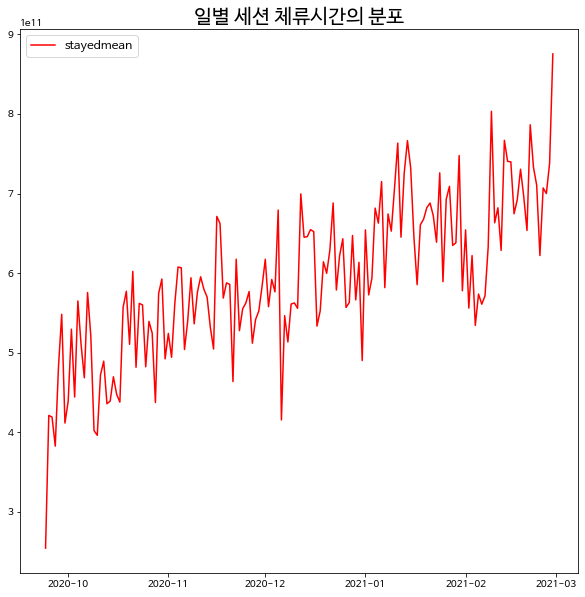

In [27]:
plt.figure(figsize=(10,10))
plt.plot(stay_.date_ , stay_.stayedmean, color='r')
plt.title('일별 세션 체류시간의 분포', fontsize=20) 
plt.legend(['stayedmean'], fontsize=12, loc='best')

plt.show()

In [28]:
# stay_.to_csv('/content/drive/MyDrive/DATA/stay_.csv')

In [29]:
stay_.stayedmean.mean()

Timedelta('0 days 00:09:51.558532112')

- 하루에 평균적으로 9분 51초' 를 체류합니다.

####  일별 구매 전환율

- 일별 전체 세션

In [36]:
df_.columns

Index(['Unnamed: 0', 'event_time', 'event_type', 'product_id', 'category_id',
       'category_code', 'brand', 'price', 'user_id', 'user_session', 'date',
       'time', 'main_category', 'mdi_category', 'sub_category', 'date_',
       'diff', 'check_', 'coh', 'new_session', 'New_sessoion', 'start_day',
       'start_week', 'start_month', 'New_sessoion', 'Session'],
      dtype='object')

In [38]:
df_.columns = ['Unnamed: 0', 'event_time', 'event_type', 'product_id', 'category_id',
       'category_code', 'brand', 'price', 'user_id', 'user_session', 'date',
       'time', 'main_category', 'mdi_category', 'sub_category', 'date_',
       'diff', 'check_', 'coh', 'new_session', 'New_sessoion', 'start_day',
       'start_week', 'start_month', 'New_sessoion2', 'Session']

In [53]:
date_allnew_ = df_.groupby(['date','New_sessoion'],as_index=False).size()
date_allnew_ = date_allnew_.pivot(index='date',columns='New_sessoion',values='size').fillna(0)
date_allnew_

New_sessoion,exist,new
date,,
2020-09-24,718,1547
2020-09-25,1415,2826
2020-09-26,1218,2247
2020-09-27,1414,2437
2020-09-28,1685,3029
...,...,...
2021-02-24,2919,2884
2021-02-25,2952,2695
2021-02-26,3014,2850


In [69]:
print("총 세션은 : ",date_allnew_.new.sum(),"회 입니다.")

총 세션은 :  490210 회 입니다.


In [72]:
d_conversion_rate = df_.groupby(['date','event_type'],as_index=False)['Session'].size()
# d_conversion_rate = d_conversion_rate.pivot(index='date',columns='event_type',values='size').fillna(0)
condi =  d_conversion_rate['event_type'] == 'purchase'
d_conversion_rate = d_conversion_rate[condi]
d_conversion_rate = d_conversion_rate.reset_index()
d_conversion_rate

,index,date,event_type,size
0,1,2020-09-24,purchase,84
1,4,2020-09-25,purchase,149
2,7,2020-09-26,purchase,119
3,10,2020-09-27,purchase,110
4,13,2020-09-28,purchase,200
...,...,...,...,...
153,460,2021-02-24,purchase,292
154,463,2021-02-25,purchase,248
155,466,2021-02-26,purchase,275
156,469,2021-02-27,purchase,223


In [73]:
print("총 구매 세션은 : ",d_conversion_rate.size.sum(),"회 입니다.")

총 구매 세션은 :  632 회 입니다.


In [82]:
ratio = d_conversion_rate.size / date_allnew_.new
ratio = ratio.to_frame()
ratio = ratio.reset_index()
ratio

,date,new
0,2020-09-24,0.4085
1,2020-09-25,0.2236
2,2020-09-26,0.2813
3,2020-09-27,0.2593
4,2020-09-28,0.2086
...,...,...
153,2021-02-24,0.2191
154,2021-02-25,0.2345
155,2021-02-26,0.2218
156,2021-02-27,0.2533


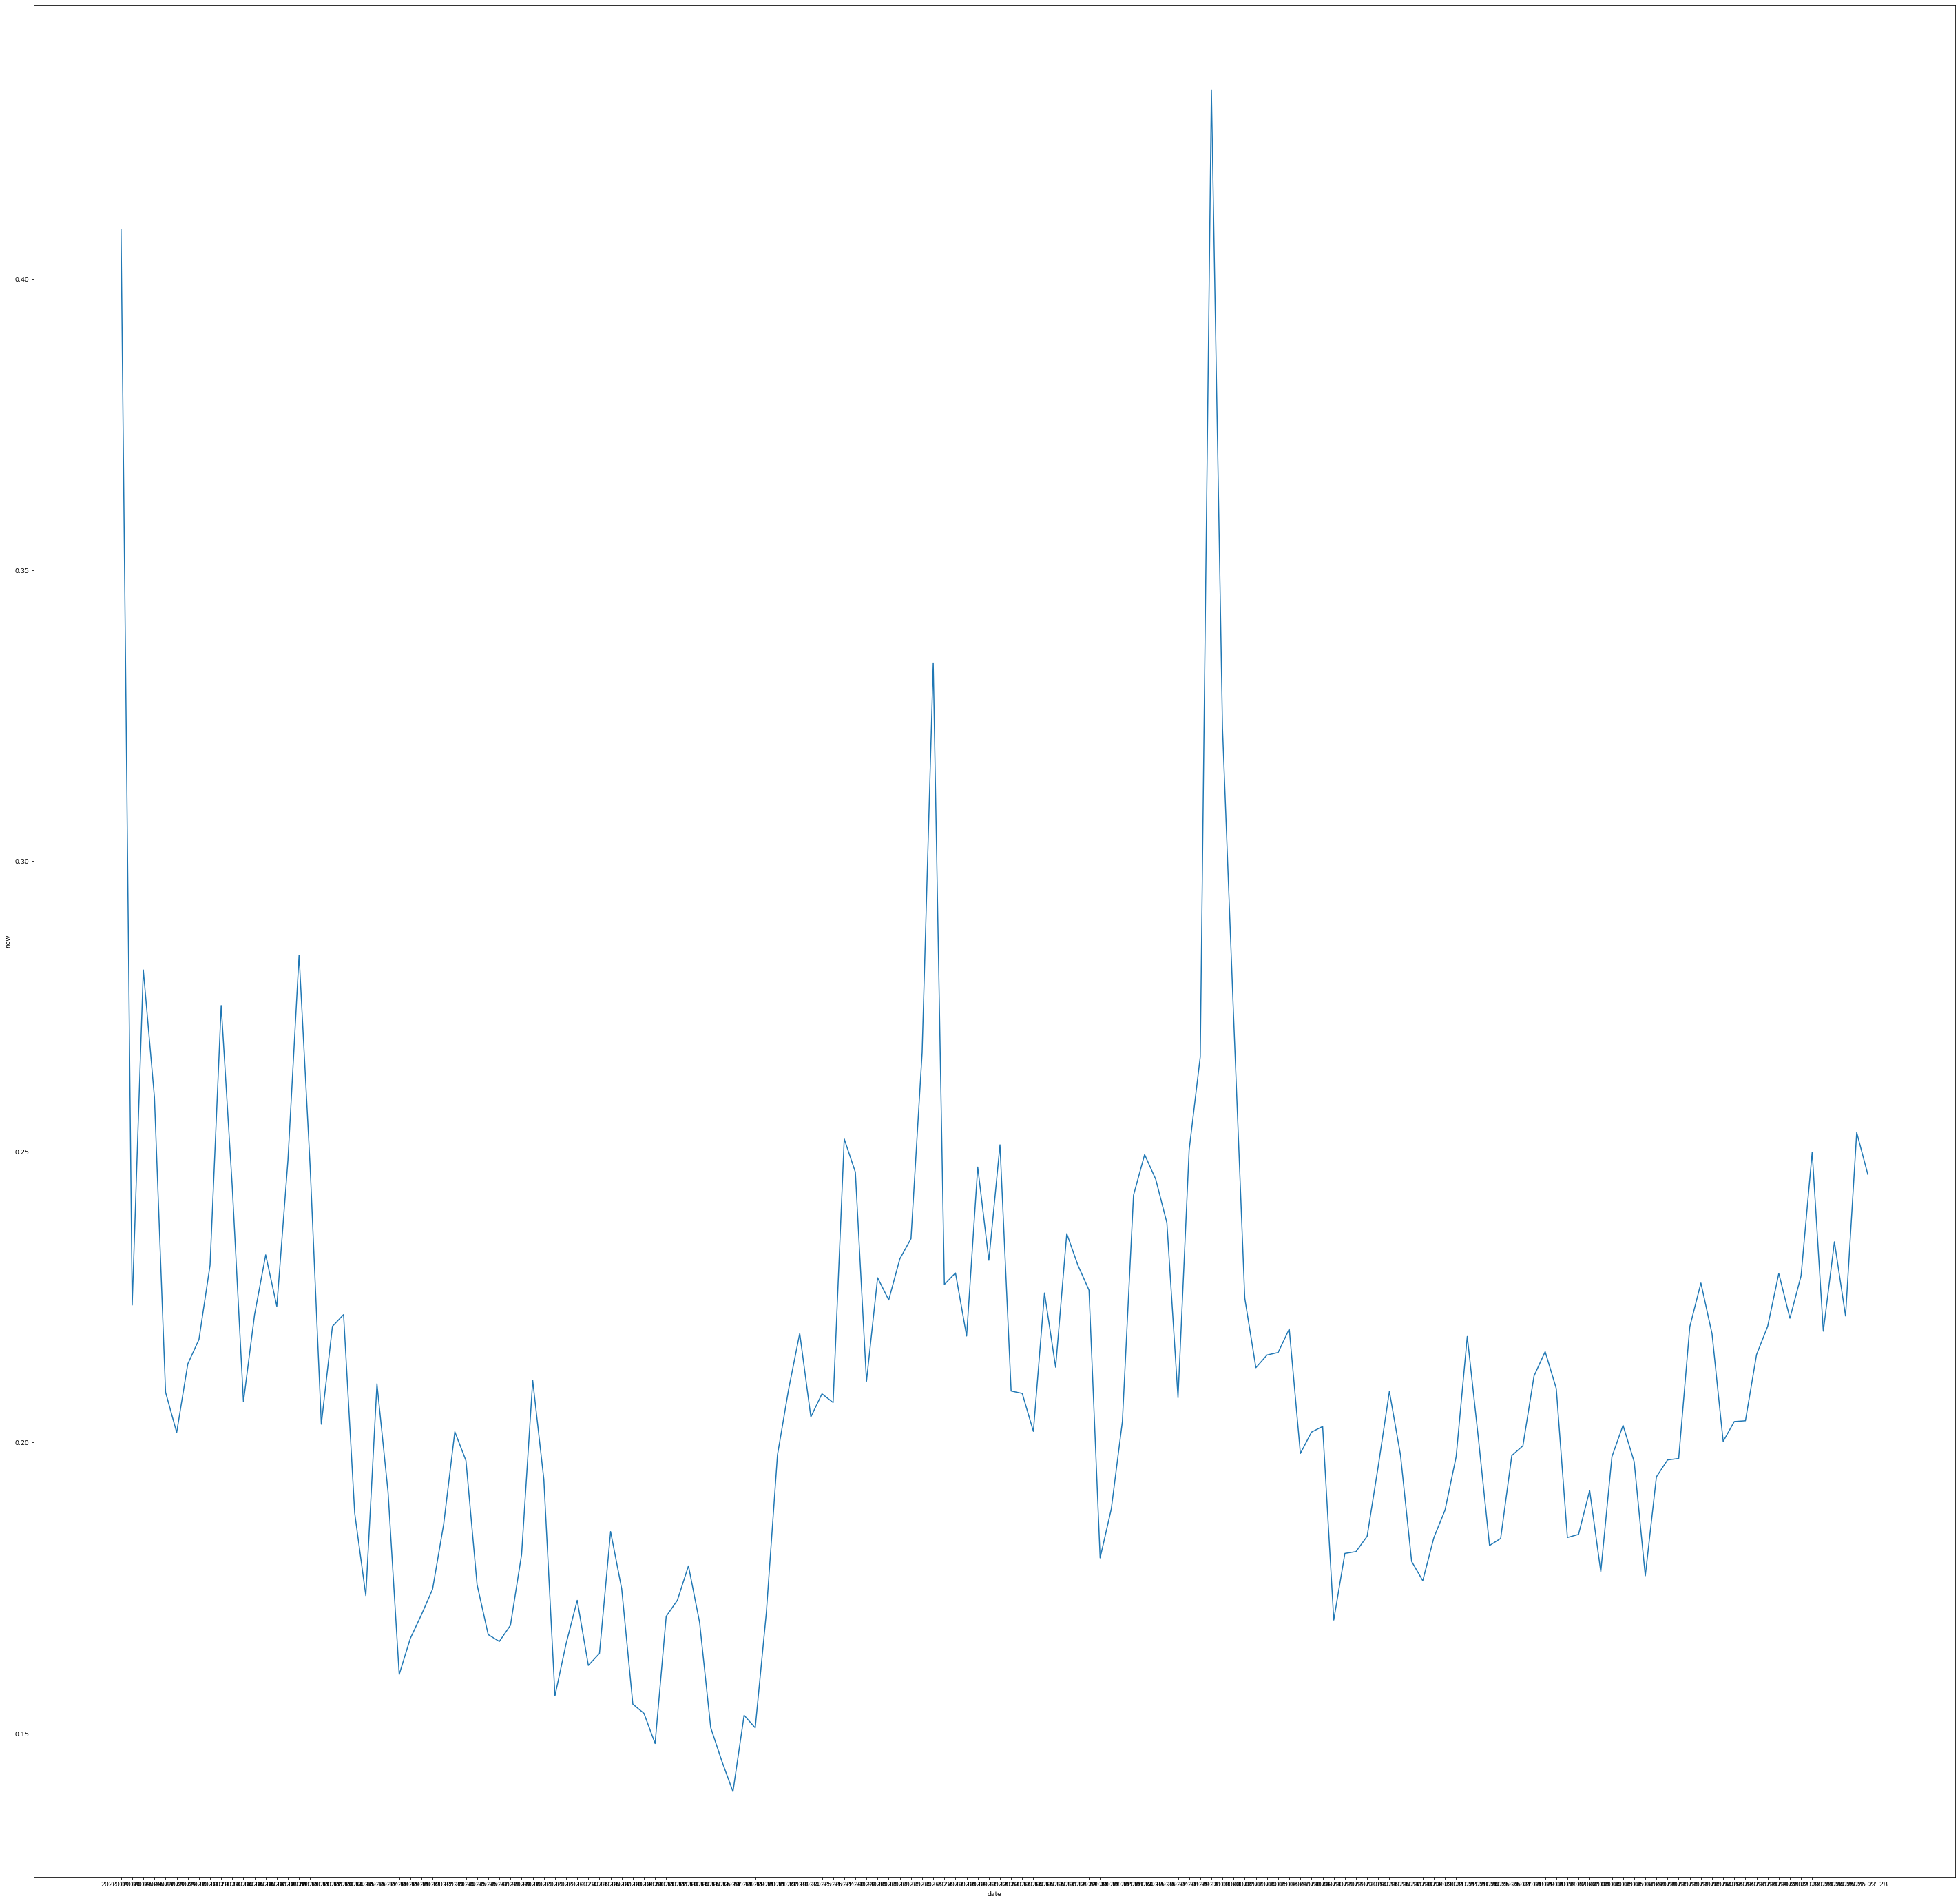

In [84]:
plt.figure(figsize=(50,50))
sns.lineplot(x="date",y= "new", data = ratio);

In [85]:
ratio.to_csv('/content/drive/MyDrive/DATA/ratio.csv')

In [86]:
d_conversion_rate = df_.groupby(['date','event_type'],as_index=False)['Session'].size()
# d_conversion_rate = d_conversion_rate.pivot(index='date',columns='event_type',values='size').fillna(0)
condi =  d_conversion_rate['event_type'] == 'cart'
d_conversion_rate = d_conversion_rate[condi]
d_conversion_rate.reset_index()

,index,date,event_type,size
0,0,2020-09-24,cart,99
1,3,2020-09-25,cart,240
2,6,2020-09-26,cart,177
3,9,2020-09-27,cart,172
4,12,2020-09-28,cart,259
...,...,...,...,...
153,459,2021-02-24,cart,413
154,462,2021-02-25,cart,411
155,465,2021-02-26,cart,416
156,468,2021-02-27,cart,325


In [ ]:
ratio = d_conversion_rate.size / date_allnew_.new
ratio = ratio.to_frame()
ratio = ratio.reset_index()
ratio

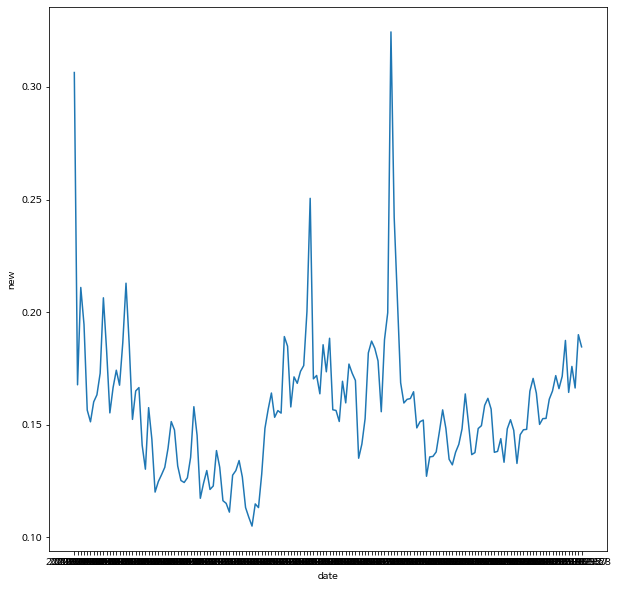

In [89]:
plt.figure(figsize=(10,10))
sns.lineplot(x="date",y= "new", data = ratio);